In [1]:
import matplotlib.pyplot as plt
import csv
from getHeroData import get_hero_data

In [2]:
def hero_data_visual(hero_name, category):
    x = []
    y = []
    stuff = []
    
    dictionary = {
        1 : 'Highest winrate',
        2 : 'Most picked',
        3 : 'Most contested',
        4 : 'Most banned',
        5 : 'Most first-picked',
        6 : 'Most banned in first ban phase'
    }
    
    dictionary2 = {
        'Highest winrate' : 'Winrate',
        'Most picked' : 'Pick Rate',
        'Most contested' : 'Contest Rate',
        'Most banned' : 'Ban Rate',
        'Most first-picked' : 'First-Pick Rate',
        'Most banned in first ban phase' : 'Ban Rate in First Ban Phase'
    }
    
    title = dictionary.get(category)
    
    exist = input('Is there an individual file for '+hero_name+' in this directory? (y/n): ')
    if exist.upper() == 'N':
        get_hero_data(hero_name)
        print('Saved: '+hero_name+'.csv')
        
    op = input('\nWould you like to gather ordinal rankings or percent values? (o/p): ')
    
    if op.upper() == 'O':
        v = 2
    else:
        v = 3
    
    file = open(hero_name+'.csv', 'r')
    reader = csv.reader(file)
    
    for line in reader:
        stuff.append(line)
    for i in range(len(stuff)):
        i = -(i+1)
        if stuff[i][1] == title:
            x.append(stuff[i][0])
            y.append(int(stuff[i][v]))
        
    print('\nWould you like to compare the category you entered with another one?')
    c = input('If so, enter the number of the category. Otherwise, enter 0: ')
        
    if c in ['1', '2', '3', '4', '5', '6']:
        compare = True
        title2 = dictionary.get(int(c))
        x2 = []
        y2 = []
        stuff2 = []
        for line in reader:
            stuff2.append(line)
        for i in range(len(stuff)):
            i = -(i+1)
            if stuff[i][1] == title2:
                x2.append(stuff[i][0])
                y2.append(int(stuff[i][v]))
    else:
        compare = False

    file.close()

    plt.rcParams['figure.figsize'] = 17, 8
    plt.plot(['6.74 and below', '6.75'], [-1, max(y)], 'w')
    if compare:
        plt.plot(['6.74 and below', '6.75'], [-1, max(y2)], 'w')
    plt.plot(x, y)
    plt.xlabel('Patch')
    if v == 2:
        plt.ylabel('Ordinal Rank')
    else:
        plt.ylabel('Percent Value')
    if compare:
        plt.plot(x2, y2)
        plt.legend(['', '', dictionary2.get(title), dictionary2.get(title2)])
    else:
        plt.title(dictionary2.get(title))
    
    plt.show()

Is there an individual file for Juggernaut in this directory? (y/n): n
Saved: Juggernaut.csv

Would you like to gather ordinal rankings or percent values? (o/p): p

Would you like to compare the category you entered with another one?
If so, enter the number of the category. Otherwise, enter 0: 3


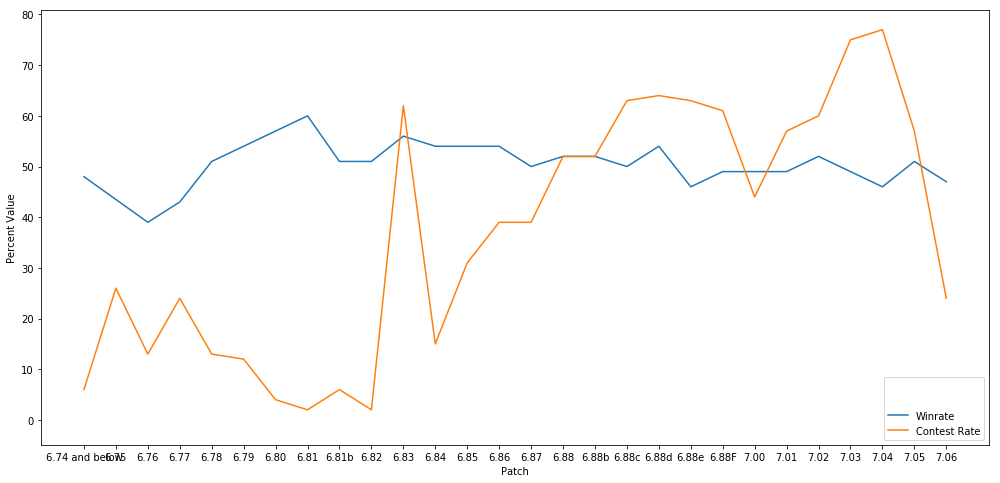

In [3]:
hero_data_visual('Juggernaut', 1)